# 3.2 Solving for a double pendulum
owo

In [39]:
import numpy as np
import matplotlib.pyplot as plt

### Unterpunkt Zero: RK4 herkopieren
weil Importieren aus notebooks is a krampf

In [40]:
#Funktion für das explizite Runge-Kutta-Verfahren 
def rk_explicit(F, y0, t, e, A, b, c):
    """
    exp. Runge–Kutta für y' =F(y, t).
    y0: 1D array
    t:  1D array der Zeit mt Schritten e (epsilon xD)
    A,b,c: Butcher coeff
    """
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    c = np.array(c, dtype=float)

    s = len(b) 
    y0 = np.array(y0, dtype=float)
    dim = len(y0)

    Y = np.zeros((len(t), dim))
    Y[0] = y0

    for n in range(len(t) - 1):
        yn = Y[n]
        tn = t[n]

        K = np.zeros((s, dim))  # stage derivatives

        for i in range(s):
            y_stage = yn.copy()
            for j in range(i):  # explizit nur j < i
                y_stage += e * A[i, j] * K[j]

            K[i] = F(y_stage, tn + c[i] * e)

        Y[n + 1] = yn.copy()
        for i in range(s):
            Y[n + 1] += e * b[i] * K[i]

    return Y

#Butcher Tableus
#zerst Euler
A_eu = [[0.0]]
b_eu = [1.0]
c_eu = [0.0]

#Runge Kutta Odg 4
A_rk4 = [
    [0.0, 0.0, 0.0, 0.0],
    [0.5, 0.0, 0.0, 0.0],
    [0.0, 0.5, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
]
b_rk4 = [1/6, 1/3, 1/3, 1/6]
c_rk4 = [0.0, 0.5, 0.5, 1.0]

### Unterpunkt a: Implement the Functions and solve with RK4

In [41]:
w_sq = 9.81  # omega^2 = g/l, und l=1

def F_duop(angabe, t):
    th1, th2, p1, p2 = angabe
    th = th1 - th2
    sin, cos = np.sin(th), np.cos(th)

    th1_dot= (p1 - p2*cos) /(1 + sin**2)
    th2_dot = (2*p2 - p1*cos) / (1 + sin**2)

    A = (p1*p2*sin) /(1 + sin**2)
    B =((p1**2 + 2*p2**2 - 2*p1*p2*cos) / ((1 + sin**2)**2)) * sin*cos

    p1_dot =-A + B - 2*w_sq*np.sin(th1)
    p2_dot =A - B -1*w_sq*np.sin(th2)

    return np.array([th1_dot, th2_dot, p1_dot, p2_dot], dtype=float)

# Zeit udn Schrittweite
e = 0.001
t = np.arange(0, 100+e, e)
#Anfangswerte aus angabe
y0_1 =[0.0, 0.0, 4.0, 2.0]
y0_2= [0.0, 0.0, 0.0, 4.0]

Y_1 = rk_explicit(F_duop, y0_1, t, e, A_rk4, b_rk4, c_rk4)
Y_2 = rk_explicit(F_duop, y0_2, t, e, A_rk4, b_rk4, c_rk4)


### Unterpunkt b: Pointcaré oder so

Poincaré map gibt an ob sich ein System chaotisch oder "normal" verhält.

Paradebeispiel sind dafür Systeme von Planeten / Sternen, gibts auf google genug sachen (siehe sogar von der esa)

( link zum esa beitrag: https://www.esa.int/gsp/ACT/projects/poincare_chaos_classification/ )

Sind die Punkte weit gestreut und Flächendeckend, ist es chaotisch

Sind die Punkte auf einer elliptisch-artigen Bahn ohne viel Streuung, gibts kein Chaos

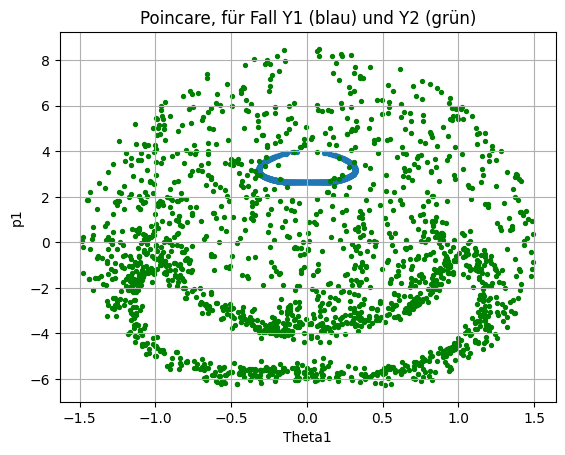

Grün ist chaotisch, und blau ist es nciht


In [42]:
t2= np.arange(0, 4000+e, e)
def pointpoints(Y, t):
    th1, th2, p1, p2 = Y[:,0], Y[:,1], Y[:,2], Y[:,3]

    q = np.where((th2[:-1] < 0) & (th2[1:] >= 0) & (p2[1:] > 0))[0]  #Bedingungen

    a = (-th2[q]) / (th2[q+1] - th2[q])          #interpolation zum gewünschten punkt, weil es nicht genau getroffen wird, copy paste aus assignment 2 xD
    th1c= th1[q] + a*(th1[q+1] - th1[q])     #i würd glauben man könnts mit ungefähr 0 auch machen, aber habs ned probiert
    p1c  = p1[q]+ a*(p1[q+1]- p1[q])

    return th1c, p1c

y0_nc =[0.0, 0.0, 4.0, 2.0]
y0_yc= [1.0, -1.0, 0.0, 3.0]

Y_nc = rk_explicit(F_duop, y0_nc, t2, e, A_rk4, b_rk4, c_rk4)
Y_yc = rk_explicit(F_duop, y0_yc, t2, e, A_rk4, b_rk4, c_rk4)

th1p, p1p = pointpoints(Y_nc, t2)
th2p, p2p = pointpoints(Y_yc, t2)


plt.figure()
plt.title("Poincare, für Fall Y1 (blau) und Y2 (grün)")
plt.scatter(th1p, p1p, s=8)
plt.scatter(th2p, p2p, s=8, color="green")
plt.xlabel("Theta1")
plt.ylabel("p1")
plt.grid(True)
plt.show()
print("Grün ist chaotisch, und blau ist es nciht")


# 10000 schritte für poincare dauern 15min34s für die beiden Datensätze
# 4000 schritte für poincare dauern 6min12s -.- ( Maßstab: Gabbos laptop, Jakob seiner is slow xD)

### Unterpunkt c: Energy Plots
Herleitung des Hamilton Operators via Theoretische Mechanik

Werd i dann noch als .png ins repo einfügen, also zum anschauen einfach 

links draufklicken :D

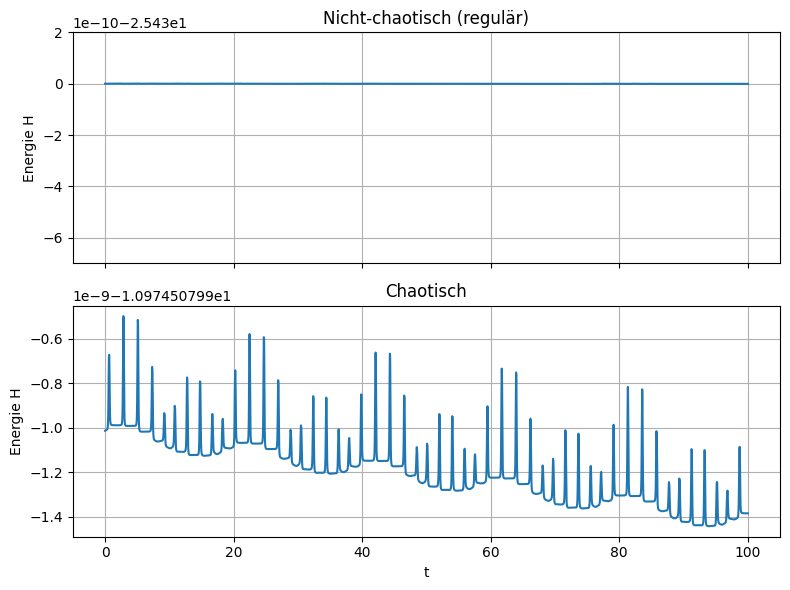

In [43]:
def H(Y, w_sq=9.81, m=1.0, l=1.0):
    th1 = Y[:,0]; th2 = Y[:,1]
    p1t = Y[:,2]; p2t = Y[:,3]   # p-tilde 
    d = th1 - th2

    T = 0.5 * (m*l**2) * ( (p1t**2 + 2*p2t**2 - 2*p1t*p2t*np.cos(d)) / (1.0 + np.sin(d)**2) )
    V = (m*l**2*w_sq) * (- 2*np.cos(th1) - np.cos(th2))  #w_sq=g/l
    return T + V

Y_nc2 = rk_explicit(F_duop, y0_nc, t, 5e-4, A_rk4, b_rk4, c_rk4) # neues e, weil sonst zu ungenau, drift beim regülaren system brutal xD
Y_yc2 = rk_explicit(F_duop, y0_yc, t, 5e-4 , A_rk4, b_rk4, c_rk4)

H1 = H(Y_yc2, w_sq=w_sq, m=1.0, l=1.0)
H2 = H(Y_nc2, w_sq=w_sq, m=1.0, l=1.0)

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax[0].plot(t, H2)
ax[0].set_ylim(H2[0] - 7e-10, H2[0] + 2e-10)
ax[0].set_ylabel("Energie H")
ax[0].set_title("Nicht-chaotisch (regulär)")
ax[0].grid(True)

ax[1].plot(t, H1)
ax[1].set_xlabel("t")
ax[1].set_ylabel("Energie H")
ax[1].set_title("Chaotisch")
ax[1].grid(True)

plt.tight_layout()
plt.show()




### Unterpunkt d: Slightly different initial conditions (spannend?)

Und berechnung von den deltas, weils strukturell gut reinpasst - is dann übersichtlicher >.<

In [44]:
e = 0.001
t3 = np.arange(0, 100+e, e)

######### NICHT CHAOTISCH #########
y0_d0 =[0.0, 0.0, 4.0, 2.0] 
y0_d1= [(0.0 + 1e-5), 0.0, 4.0, 2.0] #erster eintrag slightly off
y0_d2= [0.0, (0.0 + 1e-5), 4.0, 2.0] #zweiter eintrag slightly off
y0_d3 =[0.0, 0.0, (4.0 + 1e-5), 2.0] #dritter eintrag slightly off

Y_d0 = rk_explicit(F_duop, y0_d0, t3, e, A_rk4, b_rk4, c_rk4)
Y_d1= rk_explicit(F_duop, y0_d1, t3, e, A_rk4, b_rk4, c_rk4)
Y_d2= rk_explicit(F_duop, y0_d2, t3, e, A_rk4, b_rk4, c_rk4)
Y_d3= rk_explicit(F_duop, y0_d3, t3, e, A_rk4, b_rk4, c_rk4)

delta_d1= (np.linalg.norm(Y_d0 - Y_d1, axis=1))
delta_d2= (np.linalg.norm(Y_d0 - Y_d2, axis=1))
delta_d3= (np.linalg.norm(Y_d0 - Y_d3, axis=1))

##########    CHAOTISCH   #########
y0_e0= [1.0, -1.0, 0.0, 3.0]
y0_e1= [(1.0+ 1e-5), -1.0, 0.0, 3.0]
y0_e2= [1.0, (-1.0+ 1e-5), 0.0, 3.0]
y0_e3= [1.0, -1.0, (0.0+ 1e-5), 3.0]

Y_e0= rk_explicit(F_duop, y0_e0, t3, e, A_rk4, b_rk4, c_rk4)
Y_e1= rk_explicit(F_duop, y0_e1, t3, e, A_rk4, b_rk4, c_rk4)
Y_e2= rk_explicit(F_duop, y0_e2, t3, e, A_rk4, b_rk4, c_rk4)
Y_e3= rk_explicit(F_duop, y0_e3, t3, e, A_rk4, b_rk4, c_rk4)

delta_e1= (np.linalg.norm(Y_e0 - Y_e1, axis=1))
delta_e2= (np.linalg.norm(Y_e0 - Y_e2, axis=1))
delta_e3= (np.linalg.norm(Y_e0 - Y_e3, axis=1))

### Unterpunkt e: Plotting of $\delta(t)$

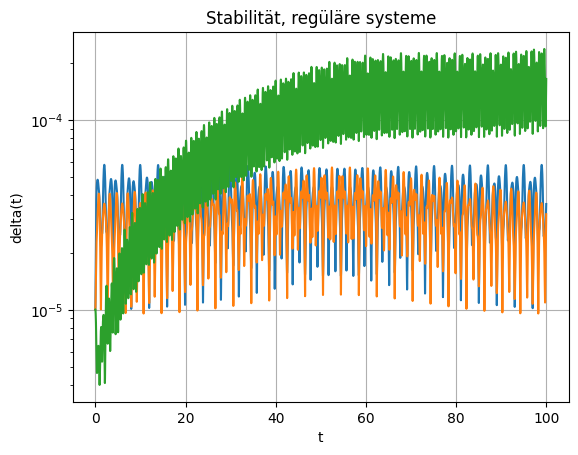

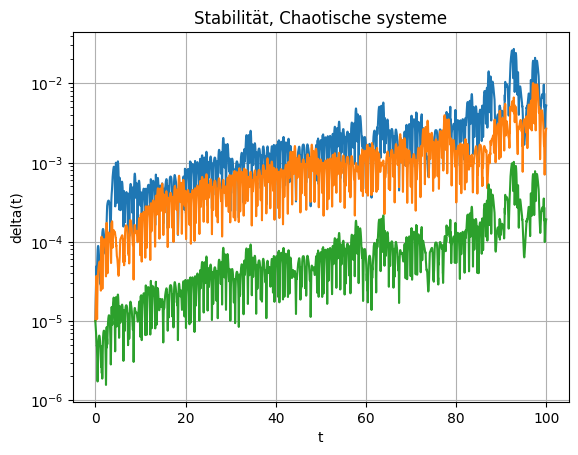

In [46]:
plt.figure()
plt.semilogy(t3, delta_d1, label="Nicht chaotisch 1")
plt.semilogy(t3, delta_d2, label="Nicht chaotisch 2")
plt.semilogy(t3, delta_d3, label="Nicht chaotisch 3")
plt.xlabel("t")
plt.ylabel("delta(t)")
plt.title("Stabilität, regüläre systeme")
plt.grid(True)
plt.show()

plt.figure()
plt.semilogy(t3, delta_e1, label="Chaotisch 1")
plt.semilogy(t3, delta_e2, label="Chaotisch 2")
plt.semilogy(t3, delta_e3, label="Chaotisch 3")
plt.xlabel("t")
plt.ylabel("delta(t)")
plt.title("Stabilität, Chaotische systeme")
plt.grid(True)
plt.show()